<div style="background-color:lightgreen; padding:10px;">
<span style="color:blue;font-family: Verdana;"><center><h1>Predicting the power consumption</h1></center></span>
</div>

## <u><span style="color:red;">Problem Statement:</span></u>
<span style="font-family: 'Verdana';"><i><h4>The objective is to develop a machine learning model that can predict the power consumption (Zone 1 Power Consumption) of Wellington, New Zealand based on various environmental and meteorological factors. The goal is to create an accurate predictive model that can assist in managing energy resources efficiently and optimizing power consumption in that zone.
</h4></i></span


## <u><span style="color:#000080;">Objective:</span></u>
<span style="font-family: 'Verdana';"><i><h4>To develop an accurate machine learning model for predicting Zone 1 Power Consumption in Wellington, New Zealand, using environmental and meteorological data, with the aim of enhancing energy resource management and optimizing power usage efficiency.</h4></i></span>
## <u><span style="color:#000080;">Data Structure:</span></u>
<span style="font-size: 18px; font-family: 'Times New Roman';">
<b>Number of Columns:</b>9
<b>Number of Rows:</b>525844
<b>Target Feature:</b>Zone 1 Power Consumption>

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;"> 
<center>Loading Necessary Libraries</center>
</div>

In [175]:
# Data analysis libraries
import pandas as pd
import numpy as np
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA


<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;"> 
    <center>Data Structure Loading and Inspection</center>
</div>

In [8]:
df = pd.read_csv("Data.csv")

In [9]:
# Understand the shape
df.shape

(52583, 9)

In [10]:
df.head()

S no Temperature Humidity Wind Speed  general diffuse flows  diffuse flows  \
0     1       6.559     73.8      0.083                  0.051          0.119   
1     2       6.414     74.5      0.083                  0.070          0.085   
2     3       6.313     74.5       0.08                  0.062          0.100   
3     4       6.121       75      0.083                  0.091          0.096   
4     5       5.921     75.7      0.081                  0.048          0.085   

   Air Quality Index (PM)  Cloudiness   Power Consumption in A Zone  
0                   158.0           1                   34055.69620  
1                   159.0           1                   29814.68354  
2                   151.0           1                   29128.10127  
3                   151.0           1                   28228.86076  
4                   154.0           1                   27335.69620

#### <span style="font-family: 'Verdana';"> Basic Summary of the Dataset</span>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


Temperature,Humidity, Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM) = has null values
inconsistancey in the target col header

In [14]:
print("string values in Temperature",df["Temperature"].astype(str).str.isalpha().sum())
print("String values in Humidity",df["Humidity"].astype(str).str.isalpha().sum())
print("String values in Wind Speed",df["Wind Speed"].astype(str).str.isalpha().sum())

string values in Temperature 320
String values in Humidity 25
String values in Wind Speed 71


#### <span style="font-family: 'Verdana';"> Numerical Features Statistics </span>

In [16]:
df.describe()

S no  general diffuse flows  diffuse flows  \
count  52583.000000           52275.000000   52568.000000   
mean   26292.000000             182.964247      74.872330   
std    15179.548939             264.571351     124.084858   
min        1.000000               0.004000       0.011000   
25%    13146.500000               0.062000       0.122000   
50%    26292.000000               5.226000       4.412000   
75%    39437.500000             320.100000     100.500000   
max    52583.000000            1163.000000     936.000000   

       Air Quality Index (PM)    Cloudiness   Power Consumption in A Zone  
count            52565.000000  52583.000000                  52583.000000  
mean               154.499191      0.009338                  31061.821779  
std                  2.871553      0.096180                   8021.057455  
min                150.000000      0.000000                   9457.750760  
25%                152.000000      0.000000                  24738.858990  
50%                155.000000      0.000000                  31189.787230  
75%                157.000000      0.000000                  36721.582445  
max                159.000000      1.000000                  52204.395120

general diffuse flows = High variability, right skewed, extreme high outliers diffuse flows = High variability, right skewed, extreme high outliers Air Quality Index (PM)= normaly distributed cloudiness = unclear distribution Power Consumption in A Zone this target var= normally distributed

In [18]:
df.describe(include="object")

Temperature Humidity Wind Speed
count        52263    52558      52512
unique        3438     4444        549
top          20.76     85.9      0.082
freq            56      200       2296

These features are not objects dtype, we have to change it into numeric dtype.

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Data Cleaning</center>
</div>

#### <span style="font-family: 'Verdana';">Handling Null Values</span>

In [22]:
missing_val = pd.DataFrame({"missing count":df.isnull().sum(),"missing %":df.isnull().sum()/len(df)*100})
missing_val

missing count  missing %
S no                                      0   0.000000
Temperature                             320   0.608562
Humidity                                 25   0.047544
Wind Speed                               71   0.135025
general diffuse flows                   308   0.585741
diffuse flows                            15   0.028526
Air Quality Index (PM)                   18   0.034232
Cloudiness                                0   0.000000
 Power Consumption in A Zone              0   0.000000

#### <span style="font-family: 'Verdana';">Handling feature name and dtypes inconsistencies</span>

In [24]:
# CHANGING THE DTYPE THE FOLLOWING FEATURES
df["Temperature"] = pd.to_numeric(df["Temperature"], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'],errors="coerce")
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'],errors="coerce")

In [25]:
df.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone'],
      dtype='object')

In [26]:
# COLUMN RENAMING
df = df.rename(columns={'Wind Speed':'Wind_speed','general diffuse flows':'general_diffuse_flows',
                        'diffuse flows':'diffuse_flows','Air Quality Index (PM)':'Air_quality_index_(PM)',
                        ' Power Consumption in A Zone':'Power_Consumption_in_A_Zone'})

In [27]:
df.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind_speed',
       'general_diffuse_flows', 'diffuse_flows', 'Air_quality_index_(PM)',
       'Cloudiness', 'Power_Consumption_in_A_Zone'],
      dtype='object')

In [28]:
df = df.fillna({'Temperature':df['Temperature'].median(),'Humidity':df['Humidity'].median(),
                'Wind_speed':df['Wind_speed'].median(),'general_diffuse_flows':df['general_diffuse_flows'].median(),
                'diffuse_flows':df['diffuse_flows'].median(),
                'Air_quality_index_(PM)':df['Air_quality_index_(PM)'].median()})

In [29]:
df.isnull().sum()

S no                           0
Temperature                    0
Humidity                       0
Wind_speed                     0
general_diffuse_flows          0
diffuse_flows                  0
Air_quality_index_(PM)         0
Cloudiness                     0
Power_Consumption_in_A_Zone    0
dtype: int64

#### <span style="font-family: 'Verdana';">Handling Duplicated Records</span>

In [31]:
df.duplicated().sum()

0

#### <span style="font-family: 'Verdana';">Handling Unwanted cols</span>

In [33]:
df = df.drop(columns=["S no"])

In [34]:
df.columns

Index(['Temperature', 'Humidity', 'Wind_speed', 'general_diffuse_flows',
       'diffuse_flows', 'Air_quality_index_(PM)', 'Cloudiness',
       'Power_Consumption_in_A_Zone'],
      dtype='object')

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>EXPLORATORY DATA ANALYSIS</center>
</div>

In [36]:
discrte_cols = [i for i in df.columns if df[i].nunique() <10]
continuous_cols=[col for col in df.columns if df[col].nunique() >=10]
print(discrte_cols)
print()
print(continuous_cols)

['Cloudiness']

['Temperature', 'Humidity', 'Wind_speed', 'general_diffuse_flows', 'diffuse_flows', 'Air_quality_index_(PM)', 'Power_Consumption_in_A_Zone']


#### <span style="font-family: 'Verdana';">Visualization of Univariate Analysis of Discrete Features</span>

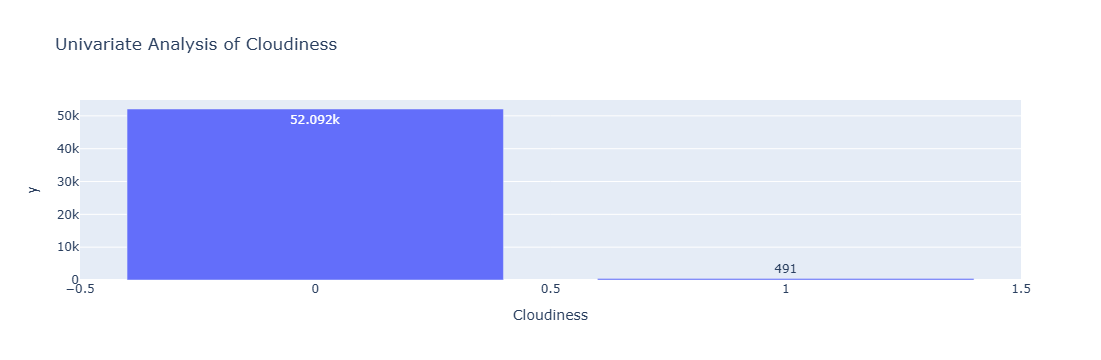

In [38]:
cloudiness_count=df['Cloudiness'].value_counts()
px.bar(cloudiness_count,x=cloudiness_count.index,y=cloudiness_count.values, title="Univariate Analysis of Cloudiness",text_auto=True)

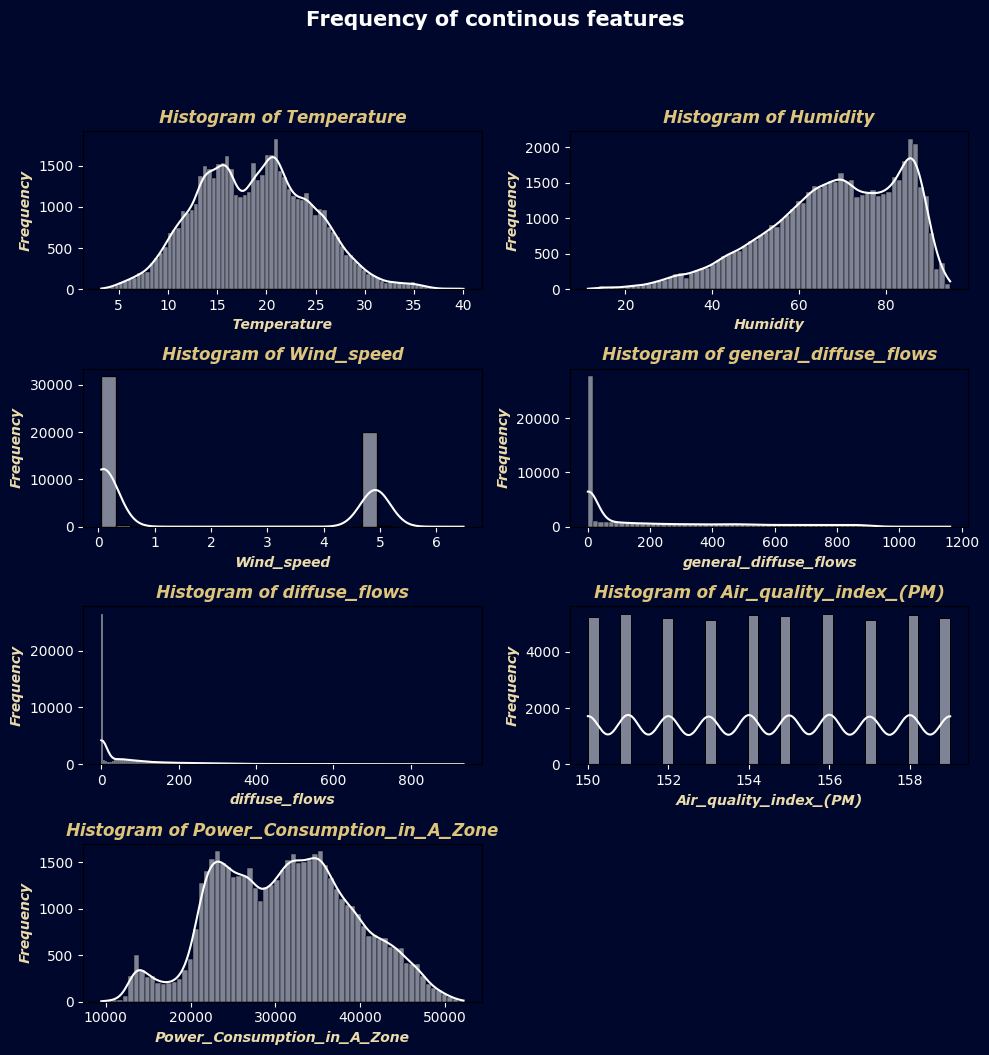

In [39]:
fig,ax = plt.subplots(4,2,figsize=(10,10))
ax =ax.flatten()
fig.patch.set_facecolor("#00072D")
fig.suptitle("Frequency of continous features",
             fontsize=15, 
             fontweight='bold', 
             fontname='Verdana', 
             color='white', 
             y=1.05)
for i,col in enumerate(continuous_cols):
    sns.histplot(data=df,
                 x=col,
                 color="white",
                 edgecolor='black',
                 kde=True,ax=ax[i])
    ax[i].set_title(f"Histogram of {col}",fontname='Verdana',fontweight='bold',fontstyle='italic',color='#DFC57B')
    ax[i].set_xlabel(col,fontname='Verdana',fontweight='bold',fontstyle='italic',color='#ECDCAB')
    ax[i].set_ylabel("Frequency",fontname='Verdana',fontweight='bold',fontstyle='italic',color='#ECDCAB')
    ax[i].tick_params(colors='#FCFCF7')
    ax[i].set_facecolor('#00072D')
for j in range(len(continuous_cols), len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

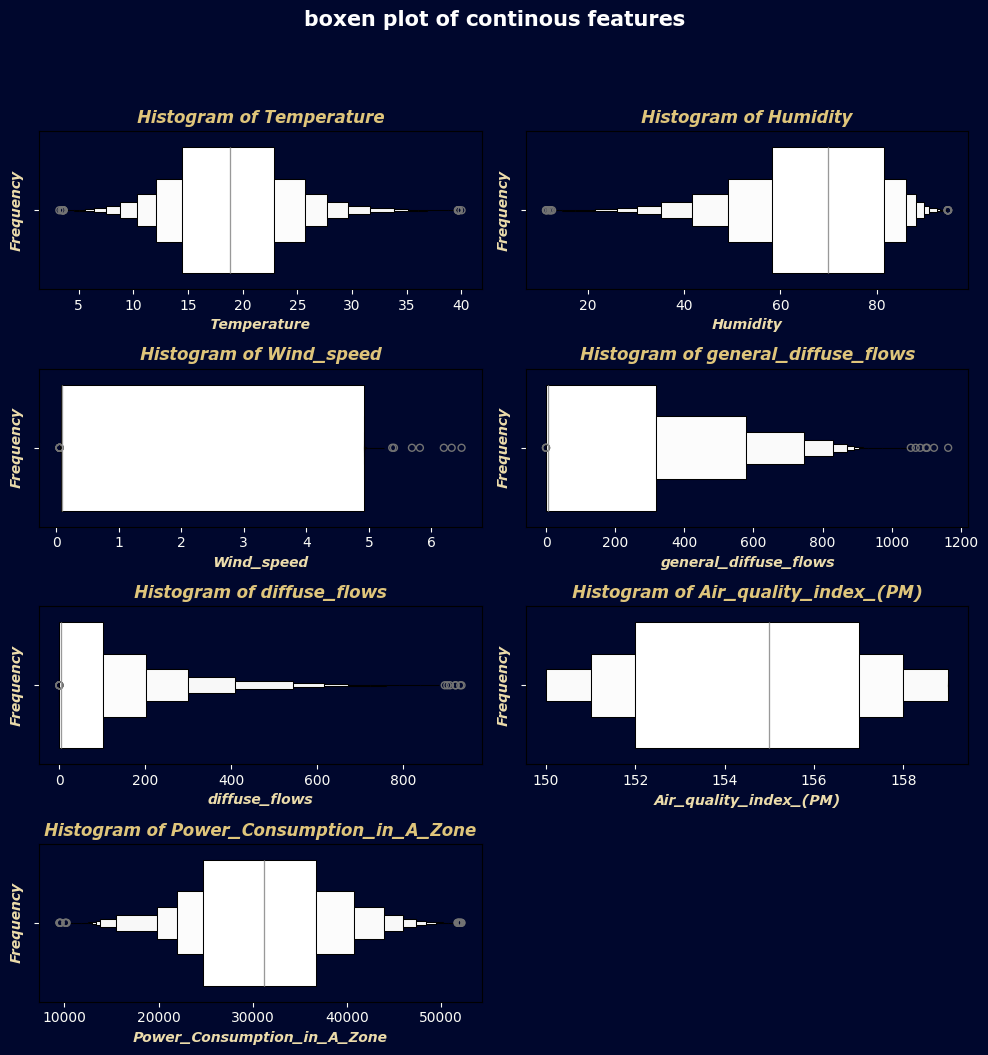

In [40]:
fig,ax = plt.subplots(4,2,figsize=(10,10))
ax =ax.flatten()
fig.patch.set_facecolor("#00072D")
fig.suptitle("boxen plot of continous features",
             fontsize=15, 
             fontweight='bold', 
             fontname='Verdana', 
             color='white', 
             y=1.05)
for i,col in enumerate(continuous_cols):
    sns.boxenplot(data=df,
                 x=col,
                 color="white",
                 edgecolor='black',
                 ax=ax[i])
    ax[i].set_title(f"Histogram of {col}",fontname='Verdana',fontweight='bold',fontstyle='italic',color='#DFC57B')
    ax[i].set_xlabel(col,fontname='Verdana',fontweight='bold',fontstyle='italic',color='#ECDCAB')
    ax[i].set_ylabel("Frequency",fontname='Verdana',fontweight='bold',fontstyle='italic',color='#ECDCAB')
    ax[i].tick_params(colors='#FCFCF7')
    ax[i].set_facecolor('#00072D')
for j in range(len(continuous_cols), len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

In [41]:
df.columns

Index(['Temperature', 'Humidity', 'Wind_speed', 'general_diffuse_flows',
       'diffuse_flows', 'Air_quality_index_(PM)', 'Cloudiness',
       'Power_Consumption_in_A_Zone'],
      dtype='object')

In [42]:
def handle_outliers():
    cols = ['Temperature', 'Humidity', 'Wind_speed', 'general_diffuse_flows', 'diffuse_flows', 'Air_quality_index_(PM)']
    for i in cols:
        q1 = df[i].quantile(.25) # np.percentile(df[i],25)
        q3 = df[i].quantile(.75)
        iqr = q3-q1
        ll = q1 - 1.5*iqr
        ul = q3 +1.5*iqr
        print("*"*20)
        print(i)
        print("lower limit =",ll)
        print("upper limit=",ul)
        print("lower ll values count=",(df[i]<ll).sum())
        print("above upper limit values count",(df[i]>ul).sum())
        print("*"*20)
handle_outliers()

********************
Temperature
lower limit = 1.8199999999999967
upper limit= 35.5
lower ll values count= 0
above upper limit values count 154
********************
********************
Humidity
lower limit = 23.75
upper limit= 115.99000000000001
lower ll values count= 295
above upper limit values count 0
********************
********************
Wind_speed
lower limit = -7.177499999999999
upper limit= 12.1705
lower ll values count= 0
above upper limit values count 0
********************
********************
general_diffuse_flows
lower limit = -475.34499999999997
upper limit= 792.4069999999999
lower ll values count= 0
above upper limit values count 2425
********************
********************
diffuse_flows
lower limit = -150.37
upper limit= 250.942
lower ll values count= 0
above upper limit values count 4621
********************
********************
Air_quality_index_(PM)
lower limit = 144.5
upper limit= 164.5
lower ll values count= 0
above upper limit values count 0
****************

In [43]:
df.describe()

Temperature      Humidity    Wind_speed  general_diffuse_flows  \
count  52583.000000  52583.000000  52583.000000           52583.000000   
mean      18.827815     68.286244      1.952796             181.923162   
std        5.795171     15.541347      2.347332             264.143797   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.450000     58.340000      0.078000               0.062000   
50%       18.820000     69.880000      0.086000               5.226000   
75%       22.870000     81.400000      4.915000             317.000000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse_flows  Air_quality_index_(PM)    Cloudiness  \
count   52583.000000            52583.000000  52583.000000   
mean       74.852230              154.499363      0.009338   
std       124.072864                2.871077      0.096180   
min         0.011000              150.000000      0.000000   
25%         0.122000              152.000000      0.000000   
50%         4.412000              155.000000      0.000000   
75%       100.450000              157.000000      0.000000   
max       936.000000              159.000000      1.000000   

       Power_Consumption_in_A_Zone  
count                 52583.000000  
mean                  31061.821779  
std                    8021.057455  
min                    9457.750760  
25%                   24738.858990  
50%                   31189.787230  
75%                   36721.582445  
max                   52204.395120

In [44]:
def remove_outliers():
    cols = ['Temperature', 'Humidity', 'Wind_speed', 'general_diffuse_flows', 'diffuse_flows', 'Air_quality_index_(PM)']
    for i in cols:
        q1 = df[i].quantile(.25) # np.percentile(df[i],25)
        q3 = df[i].quantile(.75)
        iqr = q3-q1
        ll = q1 - 1.5*iqr
        ul = q3 +1.5*iqr
        df[i] = df[i].clip(lower=ll, upper=ul)
remove_outliers()

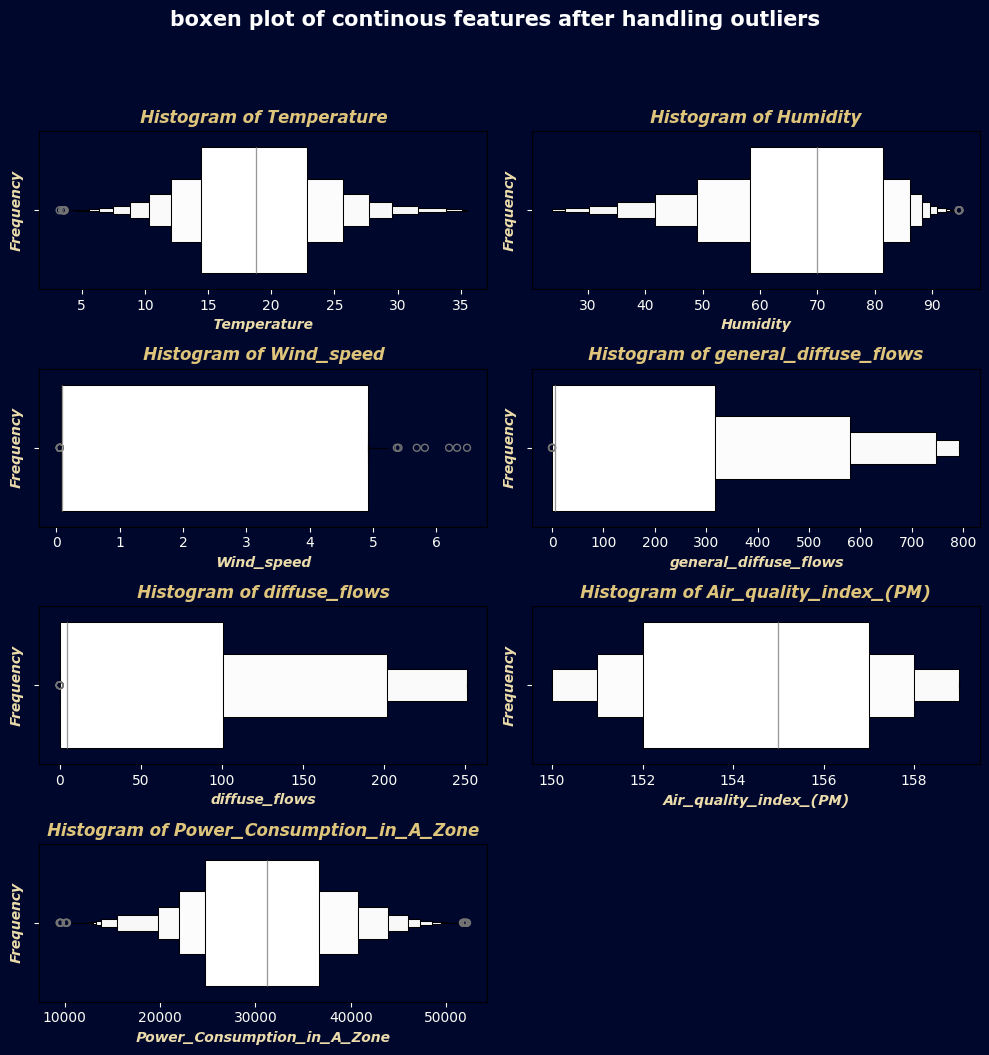

In [45]:
fig,ax = plt.subplots(4,2,figsize=(10,10))
ax =ax.flatten()
fig.patch.set_facecolor("#00072D")
fig.suptitle("boxen plot of continous features after handling outliers",
             fontsize=15, 
             fontweight='bold', 
             fontname='Verdana', 
             color='white', 
             y=1.05)
for i,col in enumerate(continuous_cols):
    sns.boxenplot(data=df,
                 x=col,
                 color="white",
                 edgecolor='black',
                 ax=ax[i])
    ax[i].set_title(f"Histogram of {col}",fontname='Verdana',fontweight='bold',fontstyle='italic',color='#DFC57B')
    ax[i].set_xlabel(col,fontname='Verdana',fontweight='bold',fontstyle='italic',color='#ECDCAB')
    ax[i].set_ylabel("Frequency",fontname='Verdana',fontweight='bold',fontstyle='italic',color='#ECDCAB')
    ax[i].tick_params(colors='#FCFCF7')
    ax[i].set_facecolor('#00072D')
for j in range(len(continuous_cols), len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

In [46]:
df.columns

Index(['Temperature', 'Humidity', 'Wind_speed', 'general_diffuse_flows',
       'diffuse_flows', 'Air_quality_index_(PM)', 'Cloudiness',
       'Power_Consumption_in_A_Zone'],
      dtype='object')

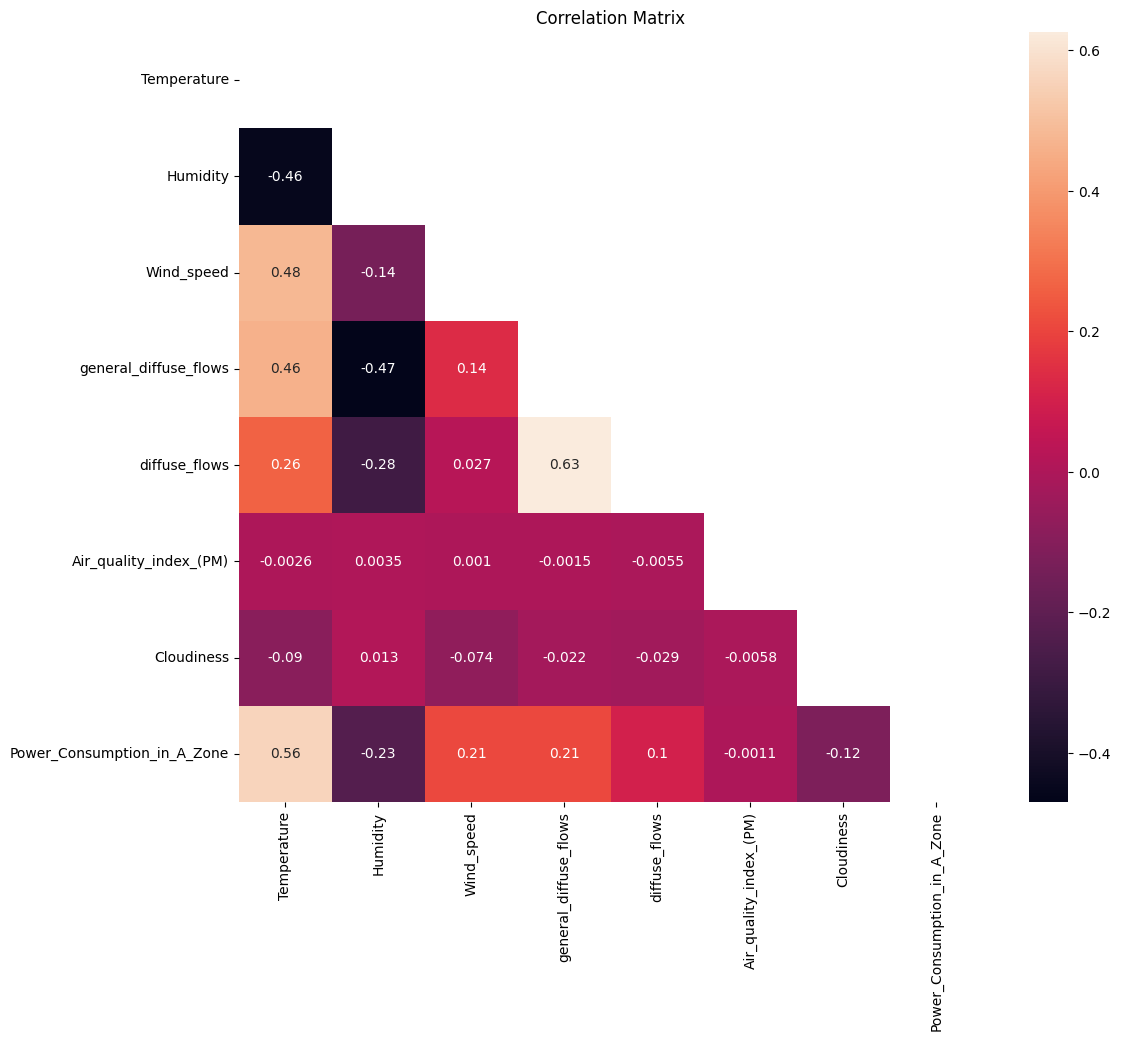

In [47]:
corr = np.corrcoef(df.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] =True
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, mask=mask)
plt.title("Correlation Matrix")
plt.show()

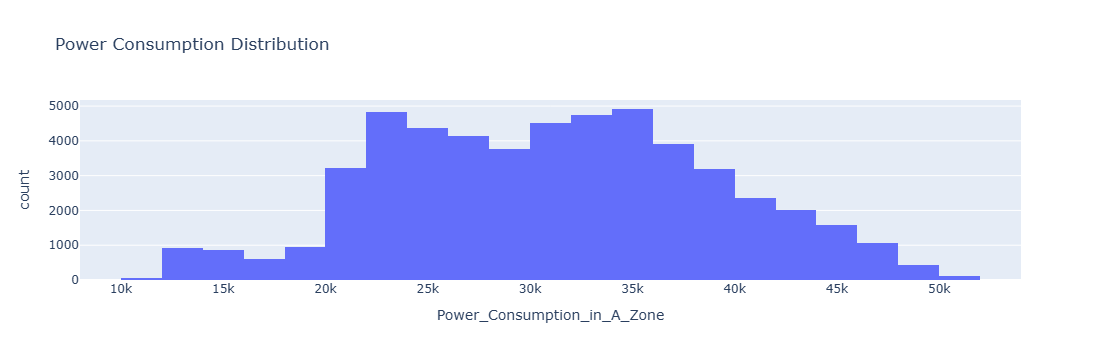

In [48]:
fig = px.histogram(df, x='Power_Consumption_in_A_Zone', nbins=30, title='Power Consumption Distribution',)
fig.show()

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Feature Engineering and Preprocessing</center>
</div>

##### <span style="font-family: 'Verdana';">Spliting and Transformation</span>

In [51]:
x = df.drop(columns=["Power_Consumption_in_A_Zone"])
y =df['Power_Consumption_in_A_Zone']

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [54]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [55]:
y_train_pred = lr.predict(x_train_scaled)
print("Training performance of the model=",r2_score(y_train,y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,y_train_pred))
y_test_pred = lr.predict(x_test_scaled)
print("Testing performance of the Model=",r2_score(y_test,y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,y_test_pred))

Training performance of the model= 0.32608181759011723
MSE of traning model =  43312842.54197243
Testing performance of the Model= 0.33159794758276606
MSE of testing Model= 43178565.5465837


In [56]:
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [57]:
dt_y_train_pred = dt.predict(x_train_scaled)
print("Training performance of the model=",r2_score(y_train,dt_y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,dt_y_train_pred))
dt_y_test_pred = dt.predict(x_test_scaled)
print("Testing performance of the Model=",r2_score(y_test,dt_y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,dt_y_test_pred))

Training performance of the model= 0.9998845919339645
MSE of traning model =  7417.297118164957
Testing performance of the Model= 0.26025590976331514
MSE of testing Model= 47787239.09130693


In [58]:
rf = RandomForestRegressor()
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [59]:
rf_y_train_pred = rf.predict(x_train_scaled)
print("Training performance of the model=",r2_score(y_train,rf_y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,rf_y_train_pred))
rf_y_test_pred = rf.predict(x_test_scaled)
print("Testing performance of the Model=",r2_score(y_test,rf_y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,rf_y_test_pred))

Training performance of the model= 0.9481881207405816
MSE of traning model =  3329958.779479832
Testing performance of the Model= 0.6354423317371377
MSE of testing Model= 23550312.44693385


In [60]:
# FEATURE IMPORTANCE
rf_feature_importance = rf.feature_importances_
features = x_train.columns
rf_feature_df = pd.DataFrame({"feature":features,"Importance":rf_feature_importance})
rf_feature_df = rf_feature_df.sort_values(by="Importance",ascending=False)

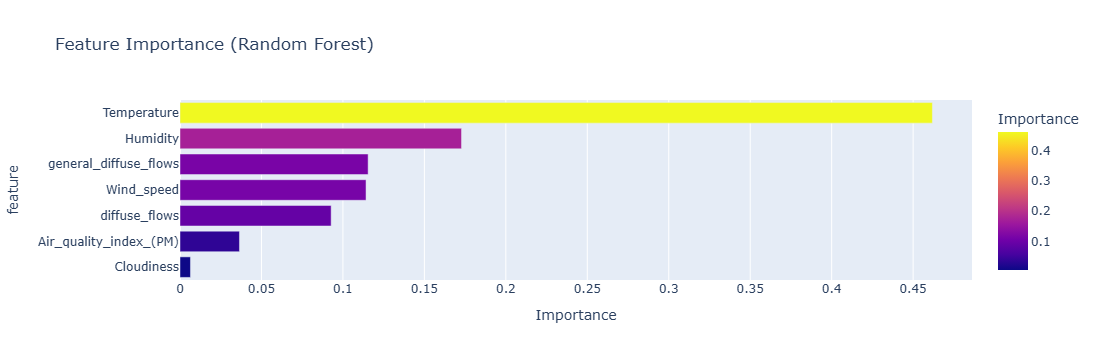

In [61]:
fig = px.bar(rf_feature_df,x="Importance",y="feature", orientation='h',
             title='Feature Importance (Random Forest)', color='Importance')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [62]:
xg = xgb.XGBRegressor()
xg.fit(x_train_scaled,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [63]:
xg_y_train_pred = xg.predict(x_train_scaled)
print("Training performance of the model=",r2_score(y_train,xg_y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,xg_y_train_pred))
xg_y_test_pred = xg.predict(x_test_scaled)
print("Testing performance of the Model=",r2_score(y_test,xg_y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,xg_y_test_pred))

Training performance of the model= 0.6565336782030304
MSE of traning model =  22074642.149088897
Testing performance of the Model= 0.5472633030178524
MSE of testing Model= 29246650.38847722


In [64]:
# ADJ R2 SCORE
n = x_test_scaled.shape[0]# n of samples
k= x_test_scaled.shape[1] # n of predictors
r2_train_xg = r2_score(y_train,xg_y_train_pred)
adjusted_r2_xg_train = 1 - ((1 -r2_train_xg ) * (n - 1) / (n - k - 1))
print(f"Adjusted R²: {adjusted_r2_xg_train}")
r2_test_xg = r2_score(y_test,xg_y_test_pred)
adjusted_r2_xg_test = 1 - ((1 -r2_test_xg ) * (n - 1) / (n - k - 1))
print(f"Adjusted R²: {adjusted_r2_xg_test}")

Adjusted R²: 0.6563048967535511
Adjusted R²: 0.546961737038323


In [65]:
# FEATURE IMPORTANCE
xg_feature_importance = xg.feature_importances_
features = x_train.columns
xg_feature_df = pd.DataFrame({"feature":features,"Importance":xg_feature_importance})
xg_feature_df = xg_feature_df.sort_values(by="Importance",ascending=False)

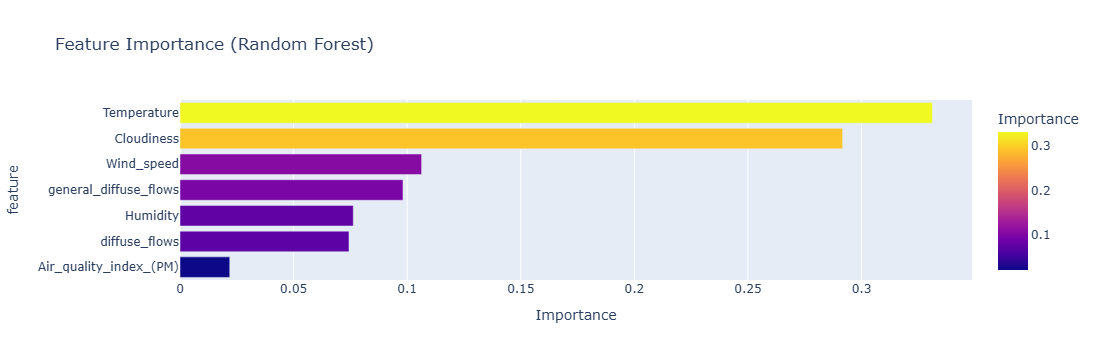

In [66]:
fig = px.bar(xg_feature_df,x="Importance",y="feature", orientation='h',
             title='Feature Importance (Random Forest)', color='Importance')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

##### <span style="font-family: 'Verdana';">CREATING MODEL AFTER HANDLING NOT IMPORTANT FEATURE</span>

In [401]:
df_01 = df.copy()

In [403]:
df_01.columns

Index(['Temperature', 'Humidity', 'Wind_speed', 'general_diffuse_flows',
       'diffuse_flows', 'Air_quality_index_(PM)', 'Cloudiness',
       'Power_Consumption_in_A_Zone'],
      dtype='object')

In [405]:
df_01 = df_01.drop(columns=["Air_quality_index_(PM)"])

In [407]:
df_01.columns

Index(['Temperature', 'Humidity', 'Wind_speed', 'general_diffuse_flows',
       'diffuse_flows', 'Cloudiness', 'Power_Consumption_in_A_Zone'],
      dtype='object')

In [409]:
x01 = df_01.drop(columns=["Power_Consumption_in_A_Zone"])
y01 = df_01['Power_Consumption_in_A_Zone']

In [411]:
x01.shape
x01.columns

Index(['Temperature', 'Humidity', 'Wind_speed', 'general_diffuse_flows',
       'diffuse_flows', 'Cloudiness'],
      dtype='object')

In [413]:
x_train,x_test,y_train,y_test = train_test_split(x01,y01,test_size=0.2,random_state=42)

In [415]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [417]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [419]:
y_train_pred = lr.predict(x_train_scaled)
print("Training performance of the model=",r2_score(y_train,y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,y_train_pred))
y_test_pred = lr.predict(x_test_scaled)
print("Testing performance of the Model=",r2_score(y_test,y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,y_test_pred))

Training performance of the model= 0.32608125228855656
MSE of traning model =  43312878.8740052
Testing performance of the Model= 0.33160233393920036
MSE of testing Model= 43178282.189316735


In [421]:
rf = RandomForestRegressor()
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [423]:
rf_y_train_pred = rf.predict(x_train_scaled)
print("Training performance of the model=",r2_score(y_train,rf_y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,rf_y_train_pred))
rf_y_test_pred = rf.predict(x_test_scaled)
print("Testing performance of the Model=",r2_score(y_test,rf_y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,rf_y_test_pred))

Training performance of the model= 0.948841504708048
MSE of traning model =  3287965.6746178684
Testing performance of the Model= 0.6395204274672922
MSE of testing Model= 23286868.72596843


In [425]:
xg = xgb.XGBRegressor()
xg.fit(x_train_scaled,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [427]:
xg_y_train_pred = xg.predict(x_train_scaled)
print("Training performance of the model=",r2_score(y_train,xg_y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,xg_y_train_pred))
xg_y_test_pred = xg.predict(x_test_scaled)
print("Testing performance of the Model=",r2_score(y_test,xg_y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,xg_y_test_pred))

Training performance of the model= 0.6534782757161613
MSE of traning model =  22271013.415320177
Testing performance of the Model= 0.5511900673192012
MSE of testing Model= 28992982.630937275


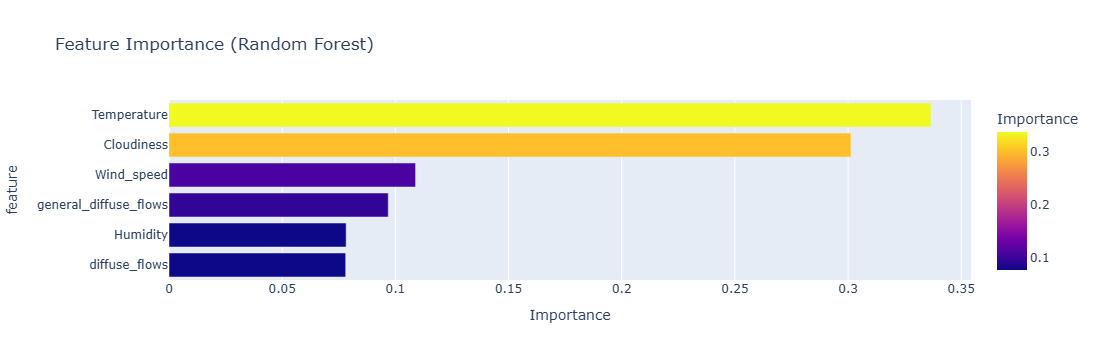

In [429]:
# FEATURE IMPORTANCE
xg_feature_importance = xg.feature_importances_
features = x_train.columns
xg_feature_df = pd.DataFrame({"feature":features,"Importance":xg_feature_importance})
xg_feature_df = xg_feature_df.sort_values(by="Importance",ascending=False)
fig = px.bar(xg_feature_df,x="Importance",y="feature", orientation='h',
             title='Feature Importance (Random Forest)', color='Importance')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

##### <span style="font-family: 'Verdana';">HYPERTUNING XGBOOST</span>

In [431]:
xg_h = xgb.XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.05,
    max_depth=10,
    min_child_weight=1,
    n_estimators=200,
    subsample=0.8,
    random_state=42  # for reproducibility
)
xg_h.fit(x_train_scaled,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [435]:
xg_y_train_pred = xg_h.predict(x_train_scaled)
print("Training performance of the model=",r2_score(y_train,xg_y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,xg_y_train_pred))
xg_y_test_pred = xg_h.predict(x_test_scaled)
print("Testing performance of the Model=",r2_score(y_test,xg_y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,xg_y_test_pred))

Training performance of the model= 0.7911792281934116
MSE of traning model =  13420948.484293763
Testing performance of the Model= 0.6045527617585116
MSE of testing Model= 25545769.099414803


In [437]:
n = x_test_scaled.shape[0]# n of samples
k= x_test_scaled.shape[1] # n of predictors
r2_train_xg = r2_score(y_train,xg_y_train_pred)
adjusted_r2_xg_train = 1 - ((1 -r2_train_xg ) * (n - 1) / (n - k - 1))
print(f"Adjusted R²: {adjusted_r2_xg_train}")
r2_test_xg = r2_score(y_test,xg_y_test_pred)
adjusted_r2_xg_test = 1 - ((1 -r2_test_xg ) * (n - 1) / (n - k - 1))
print(f"Adjusted R²: {adjusted_r2_xg_test}")

Adjusted R²: 0.7910600155739216
Adjusted R²: 0.6043270069127029


In [439]:
model_performance  = {"model_name":["LR","DT","RF","XGB","Tuned xgb"],
                     "training %":[32,99,94,65,79],"testing %":[33,25,63,55,60]}
perf_df = pd.DataFrame(model_performance)

In [87]:
perf_df

model_name  training %  testing %
0         LR          32         33
1         DT          99         25
2         RF          94         63
3        XGB          65         54
4  Tuned xgb          79         60

In [441]:
 pf_before_pca= perf_df.melt(id_vars="model_name", var_name="Score Type", value_name="Score")

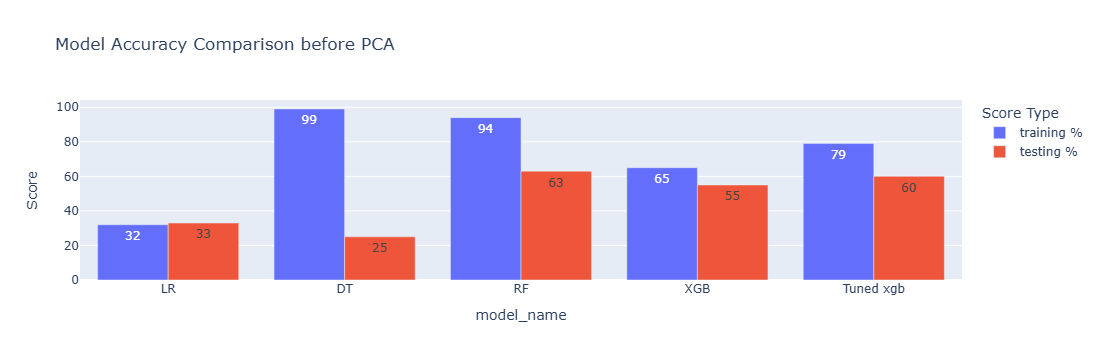

In [443]:
fig = px.bar(
    pf_before_pca,
    x="model_name",
    y="Score",
    color="Score Type",
    barmode="group",
    title="Model Accuracy Comparison before PCA",text_auto=True
)

fig.show()

Observations:
Logistic Regression (LR) is underfitting: very low scores on both training and testing.

Decision Tree (DT) is overfitting: perfect/near-perfect training score but poor testing score.

Random Forest (RF) has high training score and reasonably good testing score, better than DT.

XGBoost (XB) improves with tuning: from 65→79 (train) and 54→60 (test). This suggests the tuning helped it generalize better.

##### <center><span style="font-family: 'Verdana';">APPLYING PCA</span></center>

In [445]:
scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)
pca = PCA()
# x_pca = pca.fit_transform(x_scaled)
x_pca = pca.fit_transform(x)

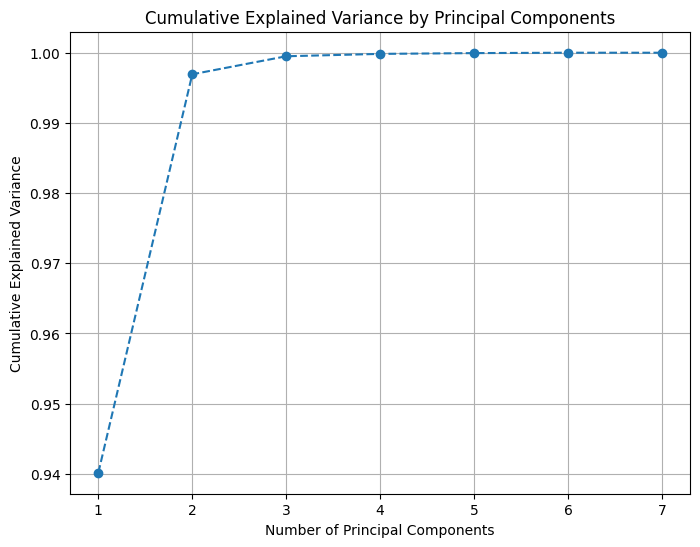

In [447]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [491]:
pca01 = PCA(n_components=2)
x_pca_reduced = pca.fit_transform(x)

In [495]:
x_train, x_test, y_train, y_test = train_test_split(x_pca_reduced, y, test_size=0.3, random_state=42)

In [497]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [499]:
y_train_pred = lr.predict(x_train)
print("Training performance of the model=",r2_score(y_train,y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,y_train_pred))
y_test_pred = lr.predict(x_test)
print("Testing performance of the Model=",r2_score(y_test,y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,y_test_pred))

Training performance of the model= 0.3251511700752229
MSE of traning model =  43153409.29657574
Testing performance of the Model= 0.3318042187611371
MSE of testing Model= 43597960.46020907


In [501]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [503]:
rf_y_train_pred = rf.predict(x_train)
print("Training performance of the model=",r2_score(y_train,rf_y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,rf_y_train_pred))
rf_y_test_pred = rf.predict(x_test)
print("Testing performance of the Model=",r2_score(y_test,rf_y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,rf_y_test_pred))

Training performance of the model= 0.9401906120544352
MSE of traning model =  3824529.1142911687
Testing performance of the Model= 0.5846837112981758
MSE of testing Model= 27098260.183163505


In [505]:
xg = xgb.XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [507]:
xg_y_train_pred = xg.predict(x_train)
print("Training performance of the model=",r2_score(y_train,xg_y_train_pred))
print("MSE of traning model = ",mean_squared_error(y_train,xg_y_train_pred))
xg_y_test_pred = xg.predict(x_test)
print("Testing performance of the Model=",r2_score(y_test,xg_y_test_pred))
print("MSE of testing Model=",mean_squared_error(y_test,xg_y_test_pred))

Training performance of the model= 0.6359373360555347
MSE of traning model =  23280095.408253744
Testing performance of the Model= 0.504968289739044
MSE of testing Model= 32299474.998917557


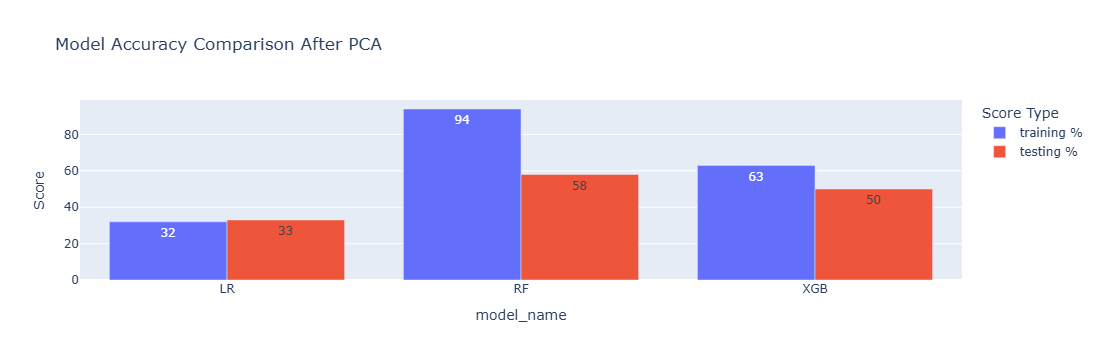

In [511]:
model_performance  = {"model_name":["LR","RF","XGB"],
                     "training %":[32,94,63],"testing %":[33,58,50]}
perf_df = pd.DataFrame(model_performance)
pf_after_pca= perf_df.melt(id_vars="model_name", var_name="Score Type", value_name="Score")

fig = px.bar(
    pf_after_pca,
    x="model_name",
    y="Score",
    color="Score Type",
    barmode="group",
    title="Model Accuracy Comparison After PCA",text_auto=True
)

fig.show()

In [515]:
data = {
    "Stage": [
        "Before PCA", "Before PCA", "Before PCA", "Before PCA",
        "After Tuning", 
        "After PCA", "After PCA", "After PCA"
    ],
    "Model": ["LR", "DT", "RF", "XB", "XB", "LR", "RF", "XGB"],
    "Training %": [32, 99, 94, 65, 79, 32, 94, 63],
    "Testing %": [33, 25, 63, 55, 60, 33, 58, 50],
    "Notes": [
        "Baseline, low accuracy, possibly underfitting",
        "Overfitting (huge gap between train and test)",
        "Good, but some overfitting",
        "Moderate, potential to improve",
        "Improved generalization after hyperparameter tuning",
        "No change — likely linear model can't capture structure",
        "Test score dropped slightly after PCA",
        "Performance dropped after dimensionality reduction"
    ]
}

df_summary = pd.DataFrame(data)
df_summary


Stage Model  Training %  Testing %  \
0    Before PCA    LR          32         33   
1    Before PCA    DT          99         25   
2    Before PCA    RF          94         63   
3    Before PCA    XB          65         55   
4  After Tuning    XB          79         60   
5     After PCA    LR          32         33   
6     After PCA    RF          94         58   
7     After PCA   XGB          63         50   

                                               Notes  
0      Baseline, low accuracy, possibly underfitting  
1      Overfitting (huge gap between train and test)  
2                         Good, but some overfitting  
3                     Moderate, potential to improve  
4  Improved generalization after hyperparameter t...  
5  No change — likely linear model can't capture ...  
6              Test score dropped slightly after PCA  
7  Performance dropped after dimensionality reduc...

🧠 Conclusion
✅ What you can infer:
Logistic Regression (LR):

No change before or after PCA → PCA didn’t help LR in this case.

Likely because LR is not powerful enough for the patterns in the data.

Decision Tree (DT):

You didn’t apply PCA/tuning to DT in this round, but earlier it clearly overfit.

Random Forest (RF):

Test accuracy dropped from 63% → 58% after PCA.

PCA may have removed important information for RF, which already handles high-dimensional data well.

➤ PCA is not always helpful for tree-based models like RF.

XGBoost (XGB):

Improved after tuning (60%) vs original (55%).

Dropped to 50% after PCA — again, shows PCA may not be ideal here.

Tree-based models often perform better on original features (especially when categorical or nonlinear relations exist).

🧪 Final Verdict:
Best model overall: Random Forest before PCA (Train: 94%, Test: 63%) or Tuned XGBoost (Train: 79%, Test: 60%)

PCA didn’t help in this scenario — it actually hurt performance.

Likely because you only had 6 features, and PCA is most helpful when:

High-dimensional data (many features)

Multicollinearity is present

PCA is more suitable for models sensitive to feature scale & dimensionality (like SVM, KNN, etc.), but not always needed for tree-based models.

